# SHAP - SHapley Additive exPlanations

Machine learning models are becoming increasingly complex, powerful, and able to make accurate predictions. However, as these models become "black boxes," it's even harder to understand how they arrived at those predictions. This has led to a growing focus on machine learning interpretability and explainability.

SHAP Values measure how much each feature contributes to the model's prediction. SHAP values can help you see which features are most important for the model and how they affect the outcome.


SHAP (SHapley Additive exPlanations) values are a way to explain the output of any machine learning model. It uses a game theoretic approach that measures each player's contribution to the final outcome. In machine learning, each feature is assigned an importance value representing its contribution to the model's output.

**SHAP values show how each feature affects each final prediction, the significance of each feature compared to others, and the model's reliance on the interaction between features.**

## SHAP Values in Machine Learning



SHAP values are a common way of getting a consistent and objective explanation of how each feature impacts the model's prediction.

SHAP values are based on game theory and assign an importance value to each feature in a model. **Features with positive SHAP values positively impact the prediction, while those with negative values have a negative impact. The magnitude is a measure of how strong the effect is.**

SHAP values are model-agnostic, meaning they can be used to interpret any machine learning model, including:

- Linear regression
- Decision trees
- Random forests
- Gradient boosting models
- Neural networks

## The Properties of SHAP Values

SHAP values have several useful properties that make them effective for interpreting models:

### Additivity

SHAP values are additive, which means that the contribution of each feature to the final prediction can be computed independently and then summed up. This property allows for efficient computation of SHAP values, even for high-dimensional datasets.

### Local accuracy

SHAP values add up to the difference between the expected model output and the actual output for a given input. This means that SHAP values provide an accurate and local interpretation of the model's prediction for a given input.

### Missingness

SHAP values are zero for missing or irrelevant features for a prediction. This makes SHAP values robust to missing data and ensures that irrelevant features do not distort the interpretation.

### Consistency

SHAP values do not change when the model changes unless the contribution of a feature changes. This means that SHAP values provide a consistent interpretation of the model's behavior, even when the model architecture or parameters change.

Overall, SHAP values provide a consistent and objective way to gain insights into how a machine learning model makes predictions and which features have the greatest influence.

In [1]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


In [2]:
import shap

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [4]:
import shap
shap.initjs()

In [5]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target # Target variable (species)


In [6]:
# Converting to DataFrame format

df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.drop('species', axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
df[['species']].value_counts()

species
0          50
1          50
2          50
Name: count, dtype: int64

In [9]:

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop('species', axis = 1), df[['species']], test_size=0.3, random_state=1)

# Train a machine learning model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

c:\Users\shanthi\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Implementing SHAP

In [10]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

Explainer Type | When to Use | Notes
shap.TreeExplainer | Tree-based models (XGBoost, LightGBM, CatBoost, scikit-learn RandomForest, DecisionTree, ExtraTrees, etc.) | Fast, exact for trees.
shap.LinearExplainer | Linear models (e.g., sklearn.linear_model.LinearRegression) | Fast, optimized for linear relationships.
shap.KernelExplainer | Black-box models (neural nets, SVM, ensembles, etc.) | Model-agnostic, but slow.
shap.Explainer (unified) | Automatically detects the right explainer based on your model type | Recommended as the modern default.

- SHAP value help to understand how much each feature pushed a prediction away from the baseline
- Prediction = BAseline Value+SHAP value

Term | Meaning
Baseline (expected value) | Average model prediction if you knew nothing about the sample.
SHAP value (per feature) | The contribution of each feature toward the final prediction — can be positive or negative.
Sum of SHAP values + baseline | Equals the model’s prediction for that instance! ✅

In [40]:
print(f"SHAP values shape: {shap_values.shape}") #(num_samples=45, num_features=4, num_outputs=3)
print(f"X_test shape: {X_test.shape}")

SHAP values shape: (45, 4, 3)
X_test shape: (45, 4)


In [45]:
explainer.expected_value, explainer.feature_names, explainer.feature_perturbation, explainer.linearize_link, explainer.model_output

(array([0.34114286, 0.30342857, 0.35542857]),
 None,
 'tree_path_dependent',
 True,
 'raw')

In [43]:
dir(explainer)

['_TreeExplainer__dynamic_expected_value',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_shap_interactions_output',
 '_get_shap_output',
 '_instantiated_load',
 '_validate_inputs',
 'assert_additivity',
 'data',
 'data_missing',
 'expected_value',
 'explain_row',
 'feature_names',
 'feature_perturbation',
 'linearize_link',
 'link',
 'load',
 'masker',
 'model',
 'model_output',
 'output_names',
 'save',
 'shap_interaction_values',
 'shap_values',
 'supports_model_with_masker']

In [53]:
shap_values

array([[[-3.07038808e-02,  4.10009332e-02, -1.02970524e-02],
        [ 1.90383879e-02, -9.45975831e-03, -9.57862959e-03],
        [ 3.52238872e-01, -1.83697429e-01, -1.68541444e-01],
        [ 2.68283763e-01, -1.01272318e-01, -1.67011446e-01]],

       [[ 2.84257002e-02, -4.42453305e-03, -2.40011671e-02],
        [-1.05671366e-02,  7.38569751e-03,  3.18143908e-03],
        [-1.89361051e-01,  3.08818268e-01, -1.19457217e-01],
        [-1.69640369e-01,  3.54791996e-01, -1.85151627e-01]],

       [[-2.25244431e-02,  1.65711459e-02,  5.95329716e-03],
        [ 1.32225765e-03, -8.19577576e-03,  6.87351811e-03],
        [-1.81472891e-01,  3.41877300e-01, -1.60404408e-01],
        [-1.38467780e-01,  3.46318759e-01, -2.07850978e-01]],

       [[ 4.38620043e-02, -9.74853595e-03, -3.41134684e-02],
        [ 1.26013532e-02, -5.16761306e-03, -7.43374011e-03],
        [ 3.34952804e-01, -1.76387846e-01, -1.58564958e-01],
        [ 2.67440981e-01, -1.12124576e-01, -1.55316405e-01]],

       [[-2.0358

## Summary Plot

- Summary Plot shows Feature Importance of each Feature in the Model

### Beeswarm Plot Interpretation

In a beeswarm plot:

- X-axis: SHAP value (impact).

- Color: actual feature value (blue = low, red = high).

- Y-axis: feature names.

- The more spread out a feature is along the X-axis, the more important it is across samples

<Figure size 640x480 with 0 Axes>

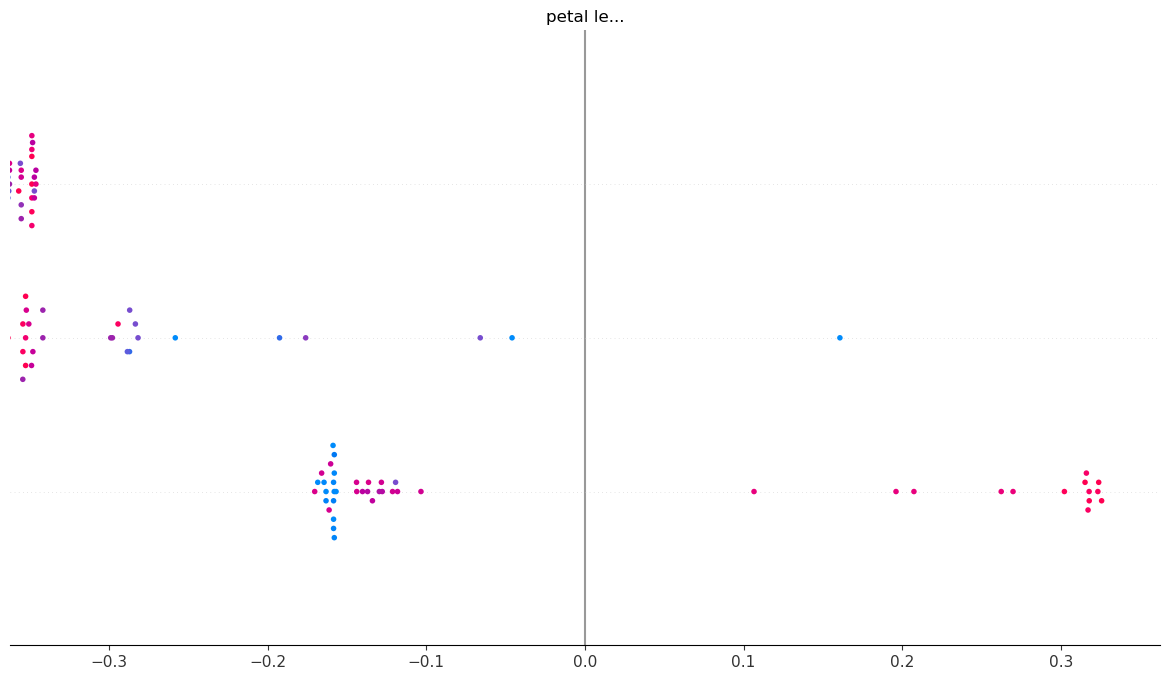

In [11]:
shap.summary_plot(shap_values, X_test)

<Figure size 640x480 with 0 Axes>

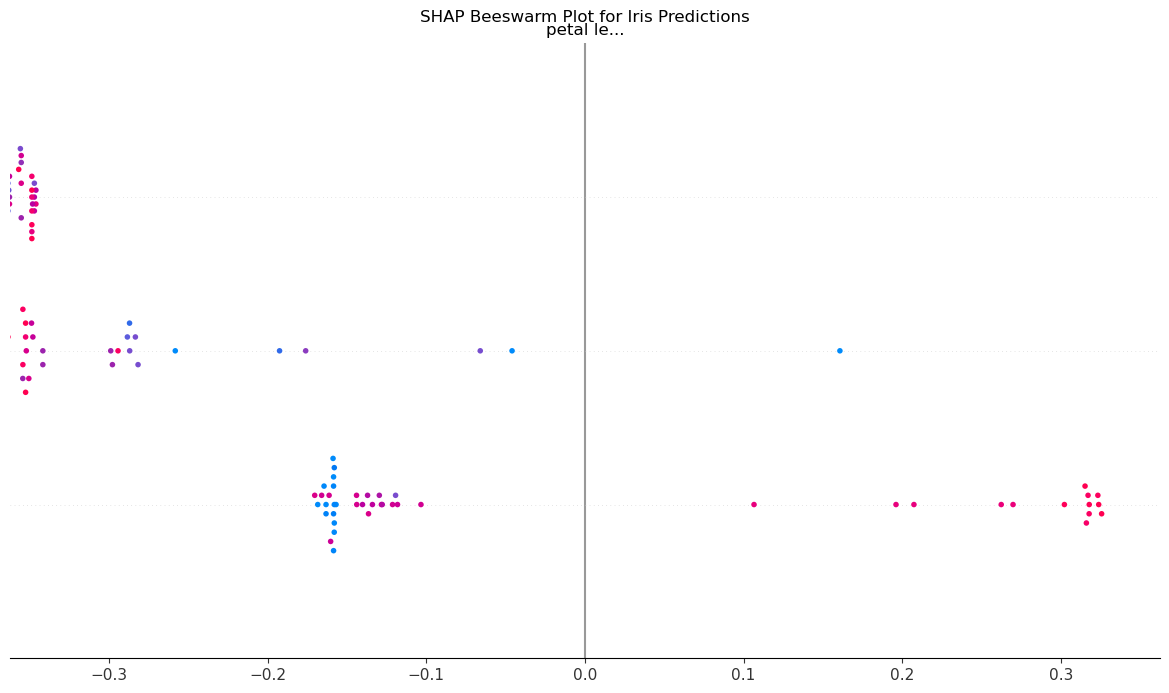

In [60]:
shap.summary_plot(shap_values, X_test, feature_names=iris.feature_names, show=False)

# Add a title
plt.suptitle("SHAP Beeswarm Plot for Iris Predictions", y=1.02)
plt.show()


### Summary Plot

- Positive SHAP value = pushed prediction higher (toward the positive class).
- 
- Negative SHAP value = pushed prediction lower (toward the negative class).
- 
- The larger the absolute value, the stronger the effect.
- 
- The sum of all SHAP values + baseline = your model's raw prediction.

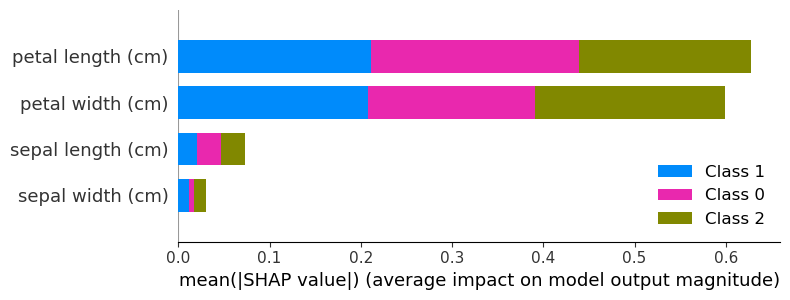

In [21]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

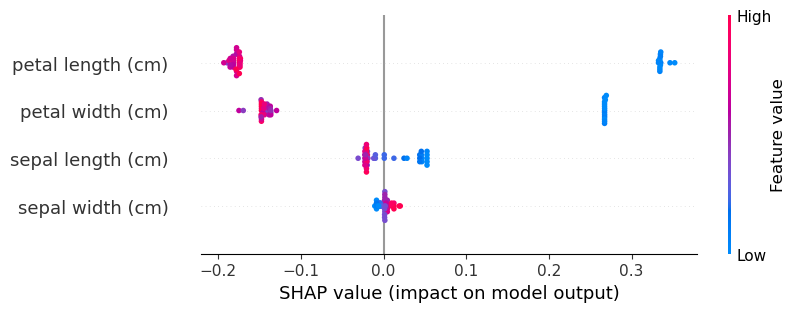

In [ ]:
#shap.summary_plot also provides the same result

shap_values_class = shap_values[:, :, 0]


explanation = shap.Explanation(
    values=shap_values_class,                 # shape: (n_samples, n_features)
    base_values=explainer.expected_value[0],  # should be a scalar or an array of shape (n_samples,)
    data=X_test.values,                       # shape: (n_samples, n_features)
    feature_names=iris.feature_names
    
)

# Plot the beeswarm
shap.plots.beeswarm(explanation, max_display=10)
plt.show()

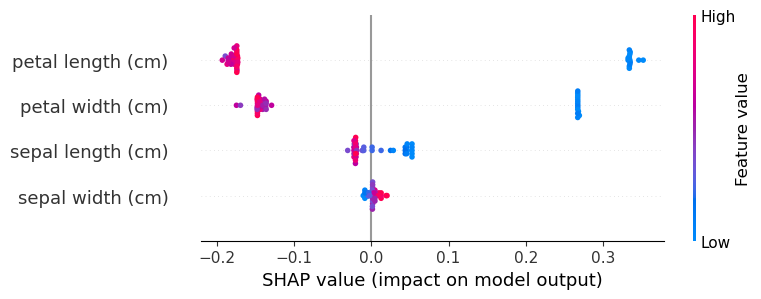

In [58]:
# Summary Plot for Class 0
shap.summary_plot(shap_values[:,:,0], X_test)

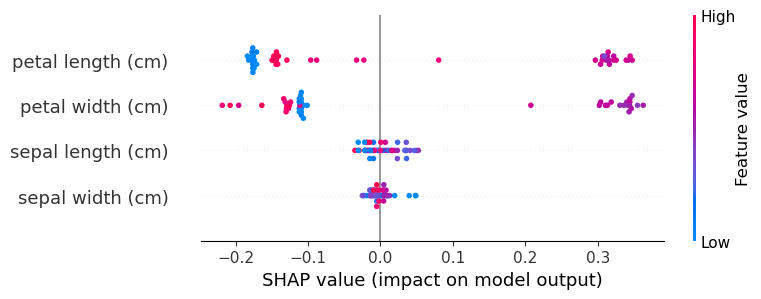

In [47]:
# Summary Plot for Class 1
shap.summary_plot(shap_values[:,:,1], X_test)

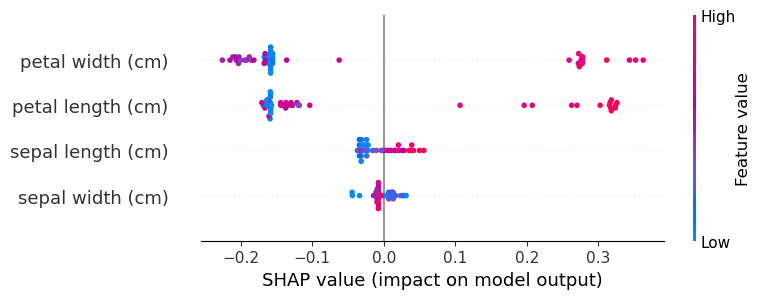

In [48]:
# Summary Plot for Class 2
shap.summary_plot(shap_values[:,:,2], X_test)

In [ ]:
## Dependent Plot - Effect of Single Feature

- A dependence plot is a type of scatter plot that displays how a model's predictions are affected by a specific feature

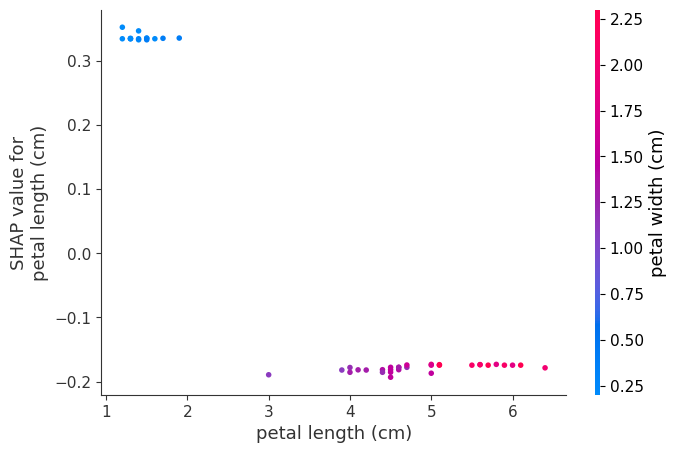

In [ ]:
# SHAP Dependence Plots (Effect of a Single Feature)
# These plots show how the value of a single feature impacts the prediction,
# often colored by another feature to show interactions.
shap.dependence_plot("petal length (cm)", shap_values[:,:,0], X_test,interaction_index="petal width (cm)") # Class 0

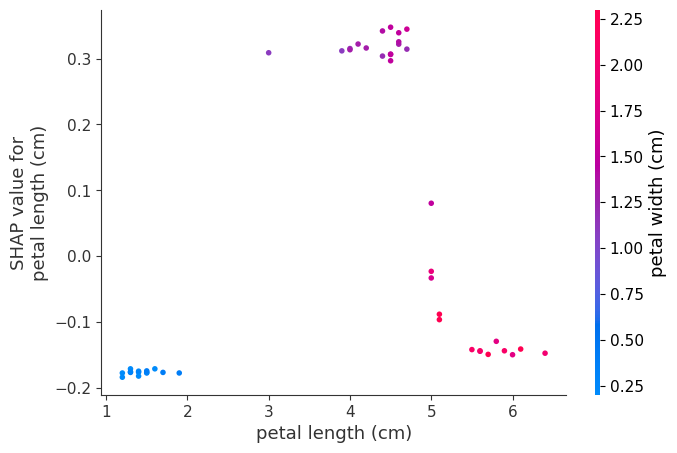

In [49]:
shap.dependence_plot("petal length (cm)", shap_values[:,:,1], X_test,interaction_index="petal width (cm)") # Class 0

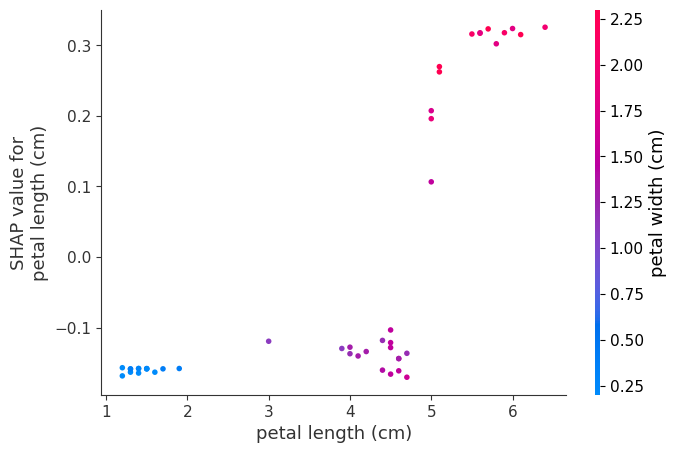

In [50]:
shap.dependence_plot("petal length (cm)", shap_values[:,:,2], X_test,interaction_index="petal width (cm)") # Class 0

## Force Plot - To explain individual predictions

|<-------------------|----------------------------->|
low prediction               high prediction
         <-- Negative SHAPs --|-- Positive SHAPs -->

shap.plots.force(
    base_value,  # model’s expected output before seeing any features
    shap_values, # SHAP values for one row (1D array: one value per feature)
    features,    # the actual feature values for that row
    feature_names=feature_names
)


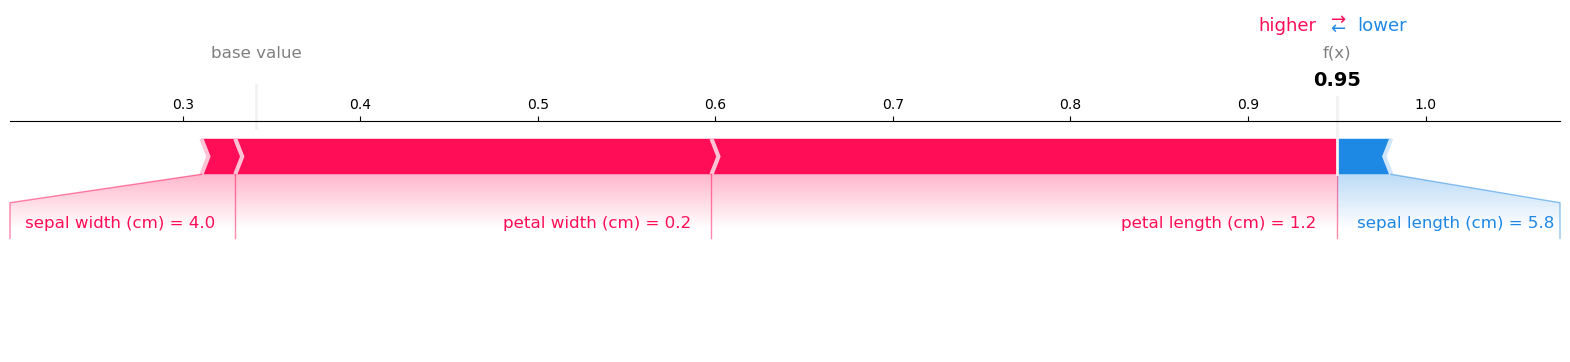

In [32]:
#shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)


shap.plots.force(
    explainer.expected_value[0],          # Expected value for class 0
    shap_values[0, :, 0],                 # SHAP values for sample 0, class 0
    X_test.iloc[0, :],                     # Features for sample 0
    feature_names=iris.feature_names,
    matplotlib = True
)


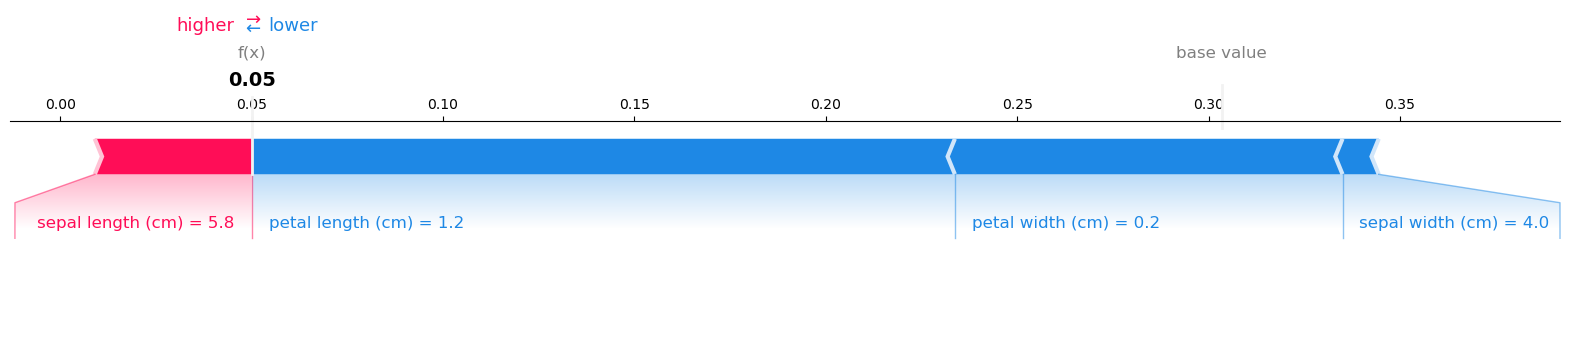

In [ ]:
# shap.plots.force(explainer.expected_value[1], shap_values[1][6, :], X_test.iloc[6, :],matplotlib = True)
shap.plots.force(
    explainer.expected_value[1],          # Expected value for class 1
    shap_values[0, :, 1],                 # SHAP values for sample 0, class 1
    X_test.iloc[0, :],                     # Features for sample 0
    feature_names=iris.feature_names,
    matplotlib = True
)


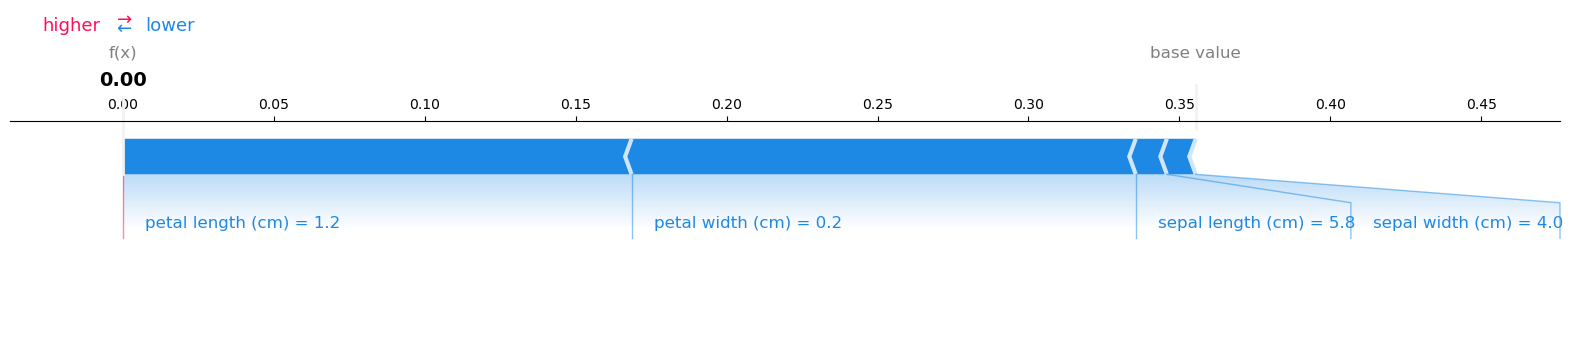

In [ ]:
shap.plots.force(
    explainer.expected_value[2],          # Expected value for class 2
    shap_values[0, :, 2],                 # SHAP values for sample 0, class 2
    X_test.iloc[0, :],                     # Features for sample 0
    feature_names=iris.feature_names,
    matplotlib = True
)

## Decision Plot

It visually depicts the model decisions by mapping the cumulative SHAP values for each prediction.

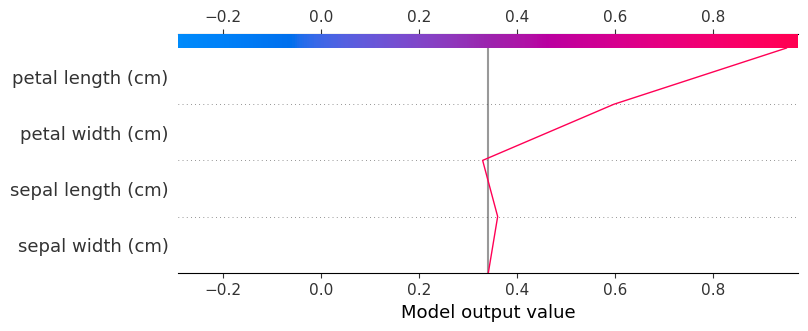

In [36]:
# shap.decision_plot(explainer.expected_value[0], shap_values[0], X_test.columns)
shap.decision_plot(explainer.expected_value[0], shap_values[0, :, 0], X_test.columns)

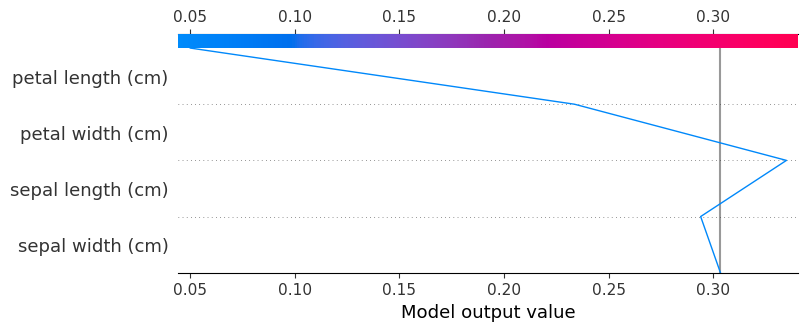

In [37]:
# shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns)
shap.decision_plot(explainer.expected_value[1], shap_values[0, :, 1], X_test.columns)

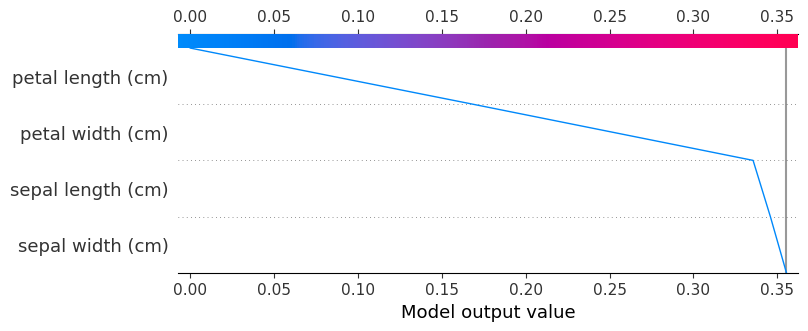

In [39]:
shap.decision_plot(explainer.expected_value[2], shap_values[0, :, 2], X_test.columns)

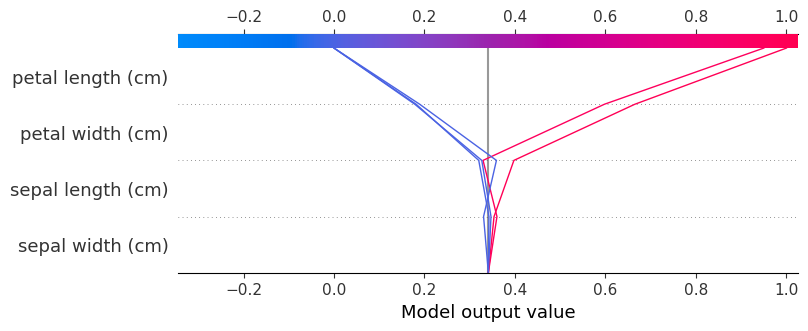

In [62]:
shap.plots.decision(
    explainer.expected_value[0],
    shap_values[:5, :, 0],  # First 5 samples
    feature_names=iris.feature_names
)


Feature | Force Plot | Decision Plot
Purpose | Explain one prediction visually. | Explain one or more predictions and the step-by-step contribution of features.
Interpretation | Shows how each feature pushes the output away from the baseline (expected value) for one instance. | Shows the path from the expected value to the final prediction across features (often sorted by importance).
Typical Use | Single observation, individual explanation. | Often for multiple samples at once or one sample to see "decision path".
Input Size | shap_values[i] for one instance. | shap_values for multiple instances, or one row sliced.
Visualization | Horizontal bar / force arrows. | Line chart — y-axis = model output, x-axis = feature steps.
Visual Style | shap.plots.force() - interactive, horizontal, push-pull style | shap.plots.decision() - line plot showing the prediction path as features are added one by one.



## Application of SHAP Values

Apart from machine learning interpretability and explainability, SHAP value can be used for:

- **Model debugging.** By examining the SHAP values, we can identify any biases or outliers in the data that may be causing the model to make mistakes.
- **Feature importance**. Identifying and removing low-impact features can create a more optimized model.
- **Anchoring explanations**. We can use SHAP values to explain individual predictions by highlighting the essential features that caused that prediction. It can help users understand and trust a model's decisions.
- **Model summaries**. It can provide a global summary of a model in the form of a SHAP value summary plot. It gives an overview of the most important features across the entire dataset.
- **Detecting biases**. The SHAP value analysis helps identify if certain features disproportionately affect particular groups. It enables the detection and reduction of discrimination in the model.
- **Fairness auditing**. It can be used to assess a model's fairness and ethical implications.
- **Regulatory approval**. SHAP values can help gain regulatory approval by explaining the model's decisions.

# Source:

https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability